In [ ]:
import pandas as pd
import numpy as np

In [ ]:
prefix = '/content/drive'
from google.colab import drive
drive.mount(prefix, force_remount=True)

Mounted at /content/drive


First, let's do an Exploratory Data Analysis of the Occurrence file from the bird sounds dataset

In [ ]:
# copy and paste the file path between the quotation marks below
file_path = ''

In [ ]:
bird_occurrences = pd.read_csv(file_path)
bird_occurrences.head()

<ipython-input-4-d651bcc60f3b>:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  bird_occurrences = pd.read_csv(file_path)


,id,occurrenceID,catalogNumber,basisOfRecord,collectionCode,dynamicProperties,otherCatalogNumbers,genus,specificEpithet,infraspecificEpithet,...,verbatimEventDate,fieldNotes,behavior,sex,lifeStage,preparations,references,Associated Taxa,rightsHolder,license
0,9@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC9,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Synallaxis,azarae,media,...,12-08-2002,two birds trip:http://www.cs.bris.ac.uk/home/p...,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,NaN,Bob Planqué,CC BY-NC
1,99@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC99,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Turdus,hauxwelli,NaN,...,01-10-2003,trip:http://www.cs.bris.ac.uk/home/planque/Peru/,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,NaN,Bob Planqué,CC BY-NC
2,9999@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC9999,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Myrmothera,campanisona,signata,...,04-03-1998,NaN,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,has background sounds: Selenidera reinwardtii,Allen T. Chartier,CC BY-NC
3,99999@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC99999,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Glaucidium,peruanum,NaN,...,2011-7-5,NaN,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,has background sounds: Crypturellus soui,Leonardo Ordóñez-Delgado,CC BY-NC
4,99998@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC99998,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Eleoscytalopus,indigoticus,NaN,...,2011-10-14,NaN,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,has background sounds: Pachyramphus castaneus|...,Rodrigo Dela Rosa,CC BY-NC


In [ ]:
# find out if id is an index
# The processing tutorial says:
# "The fastest way to determine whether any single column is unique is
# to check whether the number of unique values in the candidate column equals the number of elements."
len(bird_occurrences['id'].unique()) == len(bird_occurrences['id'])

True

In [ ]:
bird_occurrences.shape # number of rows and columns

(697734, 37)

In [ ]:
bird_occurrences.size # number of elements

25816158

In [ ]:
bird_occurrences.columns

Index(['id', 'occurrenceID', 'catalogNumber', 'basisOfRecord',
       'collectionCode', 'dynamicProperties', 'otherCatalogNumbers', 'genus',
       'specificEpithet', 'infraspecificEpithet', 'scientificName',
       'taxonRank', 'kingdom', 'family', 'higherClassification',
       'nomenclaturalCode', 'identificationRemarks', 'vernacularName',
       'longitudeDecimal', 'latitudeDecimal', 'geodeticDatum', 'country',
       'locality', 'verbatimElevation', 'recordedBy', 'eventDate', 'eventTime',
       'verbatimEventDate', 'fieldNotes', 'behavior', 'sex', 'lifeStage',
       'preparations', 'references', 'Associated Taxa', 'rightsHolder',
       'license'],
      dtype='object')

In [ ]:
bird_occurrences.dtypes

id                        object
occurrenceID              object
catalogNumber             object
basisOfRecord             object
collectionCode            object
dynamicProperties         object
otherCatalogNumbers       object
genus                     object
specificEpithet           object
infraspecificEpithet      object
scientificName            object
taxonRank                 object
kingdom                   object
family                    object
higherClassification      object
nomenclaturalCode         object
identificationRemarks     object
vernacularName            object
longitudeDecimal         float64
latitudeDecimal          float64
geodeticDatum             object
country                   object
locality                  object
verbatimElevation         object
recordedBy                object
eventDate                 object
eventTime                 object
verbatimEventDate         object
fieldNotes                object
behavior                  object
sex       

In [ ]:
bird_occurrences.head() # first n rows. default n = 5

,id,occurrenceID,catalogNumber,basisOfRecord,collectionCode,dynamicProperties,otherCatalogNumbers,genus,specificEpithet,infraspecificEpithet,...,verbatimEventDate,fieldNotes,behavior,sex,lifeStage,preparations,references,Associated Taxa,rightsHolder,license
0,9@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC9,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Synallaxis,azarae,media,...,12-08-2002,two birds trip:http://www.cs.bris.ac.uk/home/p...,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,NaN,Bob Planqué,CC BY-NC
1,99@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC99,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Turdus,hauxwelli,NaN,...,01-10-2003,trip:http://www.cs.bris.ac.uk/home/planque/Peru/,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,NaN,Bob Planqué,CC BY-NC
2,9999@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC9999,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Myrmothera,campanisona,signata,...,04-03-1998,NaN,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,has background sounds: Selenidera reinwardtii,Allen T. Chartier,CC BY-NC
3,99999@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC99999,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Glaucidium,peruanum,NaN,...,2011-7-5,NaN,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,has background sounds: Crypturellus soui,Leonardo Ordóñez-Delgado,CC BY-NC
4,99998@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC99998,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Eleoscytalopus,indigoticus,NaN,...,2011-10-14,NaN,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,has background sounds: Pachyramphus castaneus|...,Rodrigo Dela Rosa,CC BY-NC


In [ ]:
bird_occurrences.tail() # last n rows

,id,occurrenceID,catalogNumber,basisOfRecord,collectionCode,dynamicProperties,otherCatalogNumbers,genus,specificEpithet,infraspecificEpithet,...,verbatimEventDate,fieldNotes,behavior,sex,lifeStage,preparations,references,Associated Taxa,rightsHolder,license
697729,10000@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC10000,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Myrmothera,campanisona,signata,...,04-03-1998,Responding to playback,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,has background sounds: Cacicus cela,Allen T. Chartier,CC BY-NC
697730,100003@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC100003,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Rallus,aquaticus,NaN,...,2012-4-28,Aquatic Warbler and Spotted Crake in background,call,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,has background sounds: Acrocephalus paludicola...,Oliwier Myka,CC BY-NC
697731,100002@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC100002,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Crypturellus,soui,harterti,...,2011-7-5,animal seen:no; playback used:no,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,NaN,Leonardo Ordóñez-Delgado,CC BY-NC
697732,100001@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC100001,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Nyctidromus,albicollis,albicollis,...,2011-7-5,animal seen:no; playback used:no,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,NaN,Leonardo Ordóñez-Delgado,CC BY-NC
697733,100000@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,XC100000,HumanObservation,Wildlife sounds - Birds,NaN,NaN,Glaucidium,peruanum,NaN,...,2011-7-5,animal seen:no; playback used:no,song,NaN,NaN,field recording,https://data.biodiversitydata.nl/xeno-canto/ob...,NaN,Leonardo Ordóñez-Delgado,CC BY-NC


In [ ]:
bird_occurrences.memory_usage(deep=True) # memory usage of each column in bytes

Index                          128
id                        45970165
occurrenceID              84345535
catalogNumber             45272431
basisOfRecord             50967814
collectionCode            55818720
dynamicProperties         27441300
otherCatalogNumbers       22352014
genus                     45784195
specificEpithet           45808924
infraspecificEpithet      26846382
scientificName            53877997
taxonRank                 45050100
kingdom                   45352710
family                    47128737
higherClassification      62900605
nomenclaturalCode         42561774
identificationRemarks     22412186
vernacularName            51743015
longitudeDecimal           5581872
latitudeDecimal            5581872
geodeticDatum             42744318
country                   45491542
locality                  73080609
verbatimElevation         43023987
recordedBy                51490219
eventDate                 46333183
eventTime                 41367978
verbatimEventDate   

In [ ]:
usage_by_col = bird_occurrences.memory_usage(deep=True) # returns memory usage for each column
total_usage = usage_by_col.sum()
mbs = total_usage / 1e6 # convert to megabytes
mbs

1696.293981

In [ ]:
bird_occurrences.isnull().any()

id                       False
occurrenceID             False
catalogNumber            False
basisOfRecord            False
collectionCode           False
dynamicProperties         True
otherCatalogNumbers       True
genus                    False
specificEpithet          False
infraspecificEpithet      True
scientificName           False
taxonRank                False
kingdom                  False
family                   False
higherClassification     False
nomenclaturalCode        False
identificationRemarks     True
vernacularName           False
longitudeDecimal          True
latitudeDecimal           True
geodeticDatum             True
country                   True
locality                  True
verbatimElevation        False
recordedBy               False
eventDate                 True
eventTime                 True
verbatimEventDate         True
fieldNotes                True
behavior                  True
sex                       True
lifeStage                 True
preparat

In [ ]:
for col in bird_occurrences.columns:  # iterate over all columns
  if bird_occurrences[col].dtype not in [np.int64, np.float64]:  # ignore integer and float columns
    # print a header, all unique values, and a separator
    print('Unique Values for {}'.format(col))
    print(bird_occurrences[col].unique())
    print('')

Unique Values for id
['9@XC' '99@XC' '9999@XC' ... '100002@XC' '100001@XC' '100000@XC']

Unique Values for occurrenceID
['https://data.biodiversitydata.nl/xeno-canto/observation/XC9'
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC99'
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC9999' ...
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC100002'
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC100001'
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC100000']

Unique Values for catalogNumber
['XC9' 'XC99' 'XC9999' ... 'XC100002' 'XC100001' 'XC100000']

Unique Values for basisOfRecord
['HumanObservation' 'MachineObservation']

Unique Values for collectionCode
['Wildlife sounds - Birds']

Unique Values for dynamicProperties
[nan '{"recordingDevice":"Tascam DR-40X","microphone":"Sennheiser ME67"}'
 '{"recordingDevice":"ICD-PX240"}' ...
 '{"recordingDevice":"Sony PCM-M10","microphone":"Sennheiser ME66"}'
 '{"recordingDevice":"Edirol

In [ ]:
bird_occurrences.max()

<ipython-input-17-fb42b57a92ef>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bird_occurrences.max()


id                                                                   9@XC
occurrenceID            https://data.biodiversitydata.nl/xeno-canto/ob...
catalogNumber                                                     XC99999
basisOfRecord                                          MachineObservation
collectionCode                                    Wildlife sounds - Birds
genus                                                         Zosterornis
specificEpithet                                                 zosterops
scientificName                       Zosterornis whiteheadi ss whiteheadi
taxonRank                                                      subspecies
kingdom                                                          Animalia
family                                                       Zosteropidae
higherClassification                    Animalia|TROGONIFORMES|Trogonidae
nomenclaturalCode                                                    ICZN
vernacularName                        

Note that the maximum verbatimElevation is "неизвестно m" which Google Translate says means "unknown m". Also, some of the values for verbatimElevation are "? m" (see min below)

In [ ]:
bird_occurrences.min()

<ipython-input-18-5fa5e5bca677>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bird_occurrences.min()


id                                                              100000@XC
occurrenceID            https://data.biodiversitydata.nl/xeno-canto/ob...
catalogNumber                                                         XC1
basisOfRecord                                            HumanObservation
collectionCode                                    Wildlife sounds - Birds
genus                                                            Abeillia
specificEpithet                                                     aalge
scientificName                                          Abeillia abeillei
taxonRank                                                         species
kingdom                                                          Animalia
family                                                           10123.00
higherClassification                Animalia|ACCIPITRIFORMES|Accipitridae
nomenclaturalCode                                                    ICZN
vernacularName                        

<Axes: >

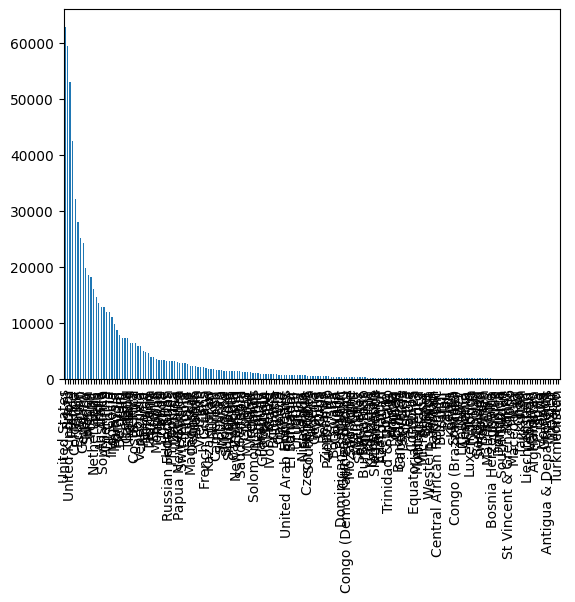

In [ ]:
bird_occurrences['country'].value_counts().plot(kind='bar')

<Axes: ylabel='country'>

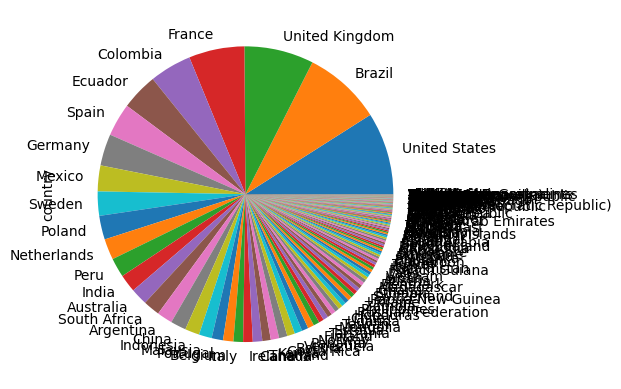

In [ ]:
bird_occurrences['country'].value_counts().plot(kind='pie')

Second, let's do an Exploratory Data Analysis of the Multimedia file from the bird sounds dataset

In [ ]:
# copy and paste file path between the quotation marks below
file_path = ''
bird_multimedia = pd.read_csv(file_path)
bird_multimedia.head()

,CoreId,associatedObservationReference,Identifier,type,Rating,rightsHolder,creator,accessURI,format,variantLiteral,description,caption,resourceCreationTechnique,captureDevice,physicalSetting,license
0,9@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/OH38YHK...,StillImage,NaN,Stichting Xeno-canto voor Natuurgeluiden,Stichting Xeno-canto voor Natuurgeluiden,https://xeno-canto.org/sounds/uploaded/OH38YHK...,image/png,ac:MediumQuality,NaN,Oscillogram of the first ten seconds of the so...,NaN,NaN,NaN,CC BY-NC-SA 3.0
1,9@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/OH38YHK...,StillImage,NaN,Stichting Xeno-canto voor Natuurgeluiden,Stichting Xeno-canto voor Natuurgeluiden,https://xeno-canto.org/sounds/uploaded/OH38YHK...,image/png,ac:MediumQuality,NaN,Spectrogram of the first ten seconds of the so...,NaN,NaN,NaN,CC BY-NC-SA 3.0
2,9@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/OH38YHK...,Sound,5.0,Bob Planqué,Bob Planqué,https://xeno-canto.org/sounds/uploaded/OH38YHK...,audio/mp3,ac:BestQuality,17 s,NaN,automatic recording: no; bitrate: 64000 bps; b...,NaN,Natural,CC BY-NC-SA 3.0
3,99@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/OH38YHK...,StillImage,NaN,Stichting Xeno-canto voor Natuurgeluiden,Stichting Xeno-canto voor Natuurgeluiden,https://xeno-canto.org/sounds/uploaded/OH38YHK...,image/png,ac:MediumQuality,NaN,Oscillogram of the first ten seconds of the so...,NaN,NaN,NaN,CC BY-NC-SA 3.0
4,99@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/OH38YHK...,StillImage,NaN,Stichting Xeno-canto voor Natuurgeluiden,Stichting Xeno-canto voor Natuurgeluiden,https://xeno-canto.org/sounds/uploaded/OH38YHK...,image/png,ac:MediumQuality,NaN,Spectrogram of the first ten seconds of the so...,NaN,NaN,NaN,CC BY-NC-SA 3.0


In [ ]:
len(bird_multimedia['Identifier'].unique()) == len(bird_multimedia['Identifier'])

False

In [ ]:
len(bird_multimedia['Identifier'].unique())

2093174

In [ ]:
len(bird_multimedia['Identifier'])

2093238

In [ ]:
len(bird_multimedia['accessURI'].unique()) == len(bird_multimedia['accessURI'])

False

In [ ]:
len(bird_multimedia['accessURI'].unique())

2093174

In [ ]:
len(bird_multimedia['accessURI'])

2093238

'Identifier' and 'accessURI' both seem not to be indices, as they are not unique. However, the number of unique 'Identifier' values and the number of unique 'accessURI' values are the same...and as we see below, these seem to match up.

In [ ]:
grouped_m = bird_multimedia.groupby(['Identifier', 'accessURI'])
grouped_m_counts = grouped_m.size().sort_values(ascending=False)
print(grouped_m_counts)

Identifier                                                                                                                                 accessURI                                                                                                                                
https://xeno-canto.org/sounds/uploaded/JXZFXAZWHY/07.05.2023%20-%2006.24%20-%20U.epops.wav                                                 https://xeno-canto.org/sounds/uploaded/JXZFXAZWHY/07.05.2023%20-%2006.24%20-%20U.epops.wav                                                   5
https://xeno-canto.org/sounds/uploaded/BTOFEKXFGW/MixPre-034.WAV                                                                           https://xeno-canto.org/sounds/uploaded/BTOFEKXFGW/MixPre-034.WAV                                                                             4
https://xeno-canto.org/sounds/uploaded/JCPKCBKKAQ/ERIRUB_230618_3575_Paimpont35_Ronciere.mp3                                               https://xeno-canto.o

In [ ]:
grouped_m_identifier = bird_multimedia.groupby(['Identifier'])
grouped_m_identifier_counts = grouped_m_identifier.size().sort_values(ascending=False)
print(grouped_m_identifier_counts)

Identifier
https://xeno-canto.org/sounds/uploaded/JXZFXAZWHY/07.05.2023%20-%2006.24%20-%20U.epops.wav                                                   5
https://xeno-canto.org/sounds/uploaded/BTOFEKXFGW/MixPre-034.WAV                                                                             4
https://xeno-canto.org/sounds/uploaded/JCPKCBKKAQ/ERIRUB_230618_3575_Paimpont35_Ronciere.mp3                                                 3
https://xeno-canto.org/sounds/uploaded/BTOFEKXFGW/MixPre-001.WAV                                                                             3
https://xeno-canto.org/sounds/uploaded/AFEHYCAHZR/Black-headedWoodpeckerEdwards.mp3                                                          2
                                                                                                                                            ..
https://xeno-canto.org/sounds/uploaded/JDGNAEDNHG/ffts/XC554011-large.png                                                          

In [ ]:
bird_multimedia.shape

(2074592, 16)

In [ ]:
bird_multimedia.size

33193472

In [ ]:
bird_multimedia.columns

Index(['CoreId', 'associatedObservationReference', 'Identifier', 'type',
       'Rating', 'rightsHolder', 'creator', 'accessURI', 'format',
       'variantLiteral', 'description', 'caption', 'resourceCreationTechnique',
       'captureDevice', 'physicalSetting', 'license'],
      dtype='object')

In [ ]:
bird_multimedia.dtypes

CoreId                             object
associatedObservationReference     object
Identifier                         object
type                               object
Rating                            float64
rightsHolder                       object
creator                            object
accessURI                          object
format                             object
variantLiteral                     object
description                        object
caption                            object
resourceCreationTechnique          object
captureDevice                      object
physicalSetting                    object
license                            object
dtype: object

In [ ]:
bird_multimedia.tail()

,CoreId,associatedObservationReference,Identifier,type,Rating,rightsHolder,creator,accessURI,format,variantLiteral,description,caption,resourceCreationTechnique,captureDevice,physicalSetting,license
2074587,100001@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,StillImage,NaN,Stichting Xeno-canto voor Natuurgeluiden,Stichting Xeno-canto voor Natuurgeluiden,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,image/png,ac:MediumQuality,NaN,Spectrogram of the first ten seconds of the so...,NaN,NaN,NaN,CC BY-NC-ND 2.5
2074588,100001@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,Sound,5.0,Leonardo Ordóñez-Delgado,Leonardo Ordóñez-Delgado,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,audio/mp3,ac:BestQuality,60 s,NaN,automatic recording: no; bitrate: 64000 bps; b...,NaN,Natural,CC BY-NC-ND 2.5
2074589,100000@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,StillImage,NaN,Stichting Xeno-canto voor Natuurgeluiden,Stichting Xeno-canto voor Natuurgeluiden,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,image/png,ac:MediumQuality,NaN,Oscillogram of the first ten seconds of the so...,NaN,NaN,NaN,CC BY-NC-ND 2.5
2074590,100000@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,StillImage,NaN,Stichting Xeno-canto voor Natuurgeluiden,Stichting Xeno-canto voor Natuurgeluiden,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,image/png,ac:MediumQuality,NaN,Spectrogram of the first ten seconds of the so...,NaN,NaN,NaN,CC BY-NC-ND 2.5
2074591,100000@XC,https://data.biodiversitydata.nl/xeno-canto/ob...,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,Sound,5.0,Leonardo Ordóñez-Delgado,Leonardo Ordóñez-Delgado,https://xeno-canto.org/sounds/uploaded/RJNSQXB...,audio/mp3,ac:BestQuality,52 s,NaN,automatic recording: no; bitrate: 64000 bps; b...,NaN,Natural,CC BY-NC-ND 2.5


In [ ]:
bird_multimedia.memory_usage()

Index                                  128
CoreId                            16596736
associatedObservationReference    16596736
Identifier                        16596736
type                              16596736
Rating                            16596736
rightsHolder                      16596736
creator                           16596736
accessURI                         16596736
format                            16596736
variantLiteral                    16596736
description                       16596736
caption                           16596736
resourceCreationTechnique         16596736
captureDevice                     16596736
physicalSetting                   16596736
license                           16596736
dtype: int64

In [ ]:
bird_multimedia.isnull().any()

CoreId                            False
associatedObservationReference    False
Identifier                        False
type                              False
Rating                             True
rightsHolder                      False
creator                           False
accessURI                         False
format                            False
variantLiteral                    False
description                        True
caption                            True
resourceCreationTechnique          True
captureDevice                      True
physicalSetting                    True
license                           False
dtype: bool

In [ ]:
for col in bird_multimedia.columns:  # iterate over all columns
  if bird_multimedia[col].dtype not in [np.int64, np.float64]:  # ignore integer and float columns
    # print a header, all unique values, and a separator
    print('Unique Values for {}'.format(col))
    print(bird_multimedia[col].unique())
    print('')

Unique Values for CoreId
['9@XC' '99@XC' '9999@XC' ... '100002@XC' '100001@XC' '100000@XC']

Unique Values for associatedObservationReference
['https://data.biodiversitydata.nl/xeno-canto/observation/XC9'
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC99'
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC9999' ...
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC100002'
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC100001'
 'https://data.biodiversitydata.nl/xeno-canto/observation/XC100000']

Unique Values for Identifier
['https://xeno-canto.org/sounds/uploaded/OH38YHKJBS/wave/XC9-large.png'
 'https://xeno-canto.org/sounds/uploaded/OH38YHKJBS/ffts/XC9-large.png'
 'https://xeno-canto.org/sounds/uploaded/OH38YHKJBS/azaras_spinetail.mp3'
 ...
 'https://xeno-canto.org/sounds/uploaded/RJNSQXBIJE/wave/XC100000-large.png'
 'https://xeno-canto.org/sounds/uploaded/RJNSQXBIJE/ffts/XC100000-large.png'
 'https://xeno-canto.org/sounds/uploaded/RJNSQXBI

In [ ]:
bird_multimedia.max()

<ipython-input-39-b9964119c69f>:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bird_multimedia.max()


CoreId                                                                         9@XC
associatedObservationReference    https://data.biodiversitydata.nl/xeno-canto/ob...
Identifier                        https://xeno-canto.org/sounds/uploaded/ZZUMKXV...
type                                                                     StillImage
Rating                                                                          5.0
rightsHolder                                                        黄世桂shigui huang
creator                                                             黄世桂shigui huang
accessURI                         https://xeno-canto.org/sounds/uploaded/ZZUMKXV...
format                                                                    image/png
variantLiteral                                                     ac:MediumQuality
license                                                                         CC0
dtype: object

In [ ]:
bird_multimedia.min()

<ipython-input-40-7c64d4b56683>:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  bird_multimedia.min()


CoreId                                                                    100000@XC
associatedObservationReference    https://data.biodiversitydata.nl/xeno-canto/ob...
Identifier                        https://xeno-canto.org/sounds/uploaded/AACMTXB...
type                                                                          Sound
Rating                                                                          1.0
rightsHolder                                               'Marco' Leslie Lieurance
creator                                                    'Marco' Leslie Lieurance
accessURI                         https://xeno-canto.org/sounds/uploaded/AACMTXB...
format                                                                    audio/mp3
variantLiteral                                                       ac:BestQuality
license                                                                   CC BY 4.0
dtype: object

Let's do an Exploratory Data Analysis of the Data file from the World Bank dataset

In [ ]:
file_path = '/content/drive/MyDrive/2023-24/CIS 5500/CIS 4500 5500 Project/raw data/WDI_CSV/WDICSV.csv'
world_bank_data = pd.read_csv(file_path)
world_bank_data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.914625,17.392349,17.892005,18.359993,18.795151,19.295176,19.788156,20.279599,20.773627,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.473301,6.720331,7.015917,7.281390,7.513673,7.809566,8.075889,8.366010,8.684137,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.870347,38.184152,38.543180,38.801719,39.039014,39.323186,39.643848,39.894830,40.213891,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.695183,31.859257,33.903515,38.851444,40.197332,43.028332,44.389773,46.268621,48.103609,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.672306,17.623956,16.516633,24.594474,25.389297,27.041743,29.138285,30.998687,32.772690,NaN


Let's find out if 'Country Name' and 'Indicator Name' form an index of the dataset, as we might guess.

In [ ]:
grouped_world_bank_data = world_bank_data.groupby(['Country Name', 'Indicator Name'])
counts = grouped_world_bank_data.size()
(counts == 1).all()

True

Yes, they do.

In [ ]:
world_bank_data.shape

(392882, 68)

In [ ]:
world_bank_data.size

26715976

In [ ]:
world_bank_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'Unnamed: 67'],
      dtype='object')

In [ ]:
world_bank_data.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1960              float64
                   ...   
2019              float64
2020              float64
2021              float64
2022              float64
Unnamed: 67       float64
Length: 68, dtype: object

In [ ]:
world_bank_data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
392877,Zimbabwe,ZWE,Women who believe a husband is justified in be...,SG.VAW.REFU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,14.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392878,Zimbabwe,ZWE,Women who were first married by age 15 (% of w...,SP.M15.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.7,NaN,NaN,NaN,5.4,NaN,NaN,NaN,NaN
392879,Zimbabwe,ZWE,Women who were first married by age 18 (% of w...,SP.M18.2024.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.4,NaN,NaN,NaN,33.7,NaN,NaN,NaN,NaN
392880,Zimbabwe,ZWE,Women's share of population ages 15+ living wi...,SH.DYN.AIDS.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,59.4,59.5,59.7,59.9,60.1,60.3,60.5,60.7,NaN,NaN
392881,Zimbabwe,ZWE,Young people (ages 15-24) newly infected with HIV,SH.HIV.INCD.YG,NaN,NaN,NaN,NaN,NaN,NaN,...,19000.0,17000.0,15000.0,13000.0,10000.0,8600.0,7700.0,6800.0,NaN,NaN


In [ ]:
world_bank_data.memory_usage()

Index                 128
Country Name      3143056
Country Code      3143056
Indicator Name    3143056
Indicator Code    3143056
                   ...   
2019              3143056
2020              3143056
2021              3143056
2022              3143056
Unnamed: 67       3143056
Length: 69, dtype: int64

In [ ]:
world_bank_data.isnull().any()

Country Name      False
Country Code      False
Indicator Name    False
Indicator Code    False
1960               True
                  ...  
2019               True
2020               True
2021               True
2022               True
Unnamed: 67        True
Length: 68, dtype: bool

In [ ]:
for col in world_bank_data.columns:  # iterate over all columns
  if world_bank_data[col].dtype not in [np.int64, np.float64]:  # ignore integer and float columns
    # print a header, all unique values, and a separator
    print('Unique Values for {}'.format(col))
    print(world_bank_data[col].unique())
    print('')

Unique Values for Country Name
['Africa Eastern and Southern' 'Africa Western and Central' 'Arab World'
 'Caribbean small states' 'Central Europe and the Baltics'
 'Early-demographic dividend' 'East Asia & Pacific'
 'East Asia & Pacific (excluding high income)'
 'East Asia & Pacific (IDA & IBRD countries)' 'Euro area'
 'Europe & Central Asia' 'Europe & Central Asia (excluding high income)'
 'Europe & Central Asia (IDA & IBRD countries)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income' 'IBRD only'
 'IDA & IBRD total' 'IDA blend' 'IDA only' 'IDA total'
 'Late-demographic dividend' 'Latin America & Caribbean'
 'Latin America & Caribbean (excluding high income)'
 'Latin America & the Caribbean (IDA & IBRD countries)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income' 'Middle East & North Africa'
 'Middle East & North Africa (excluding high income)'
 'Middle East & Nort

In [ ]:
print(world_bank_data['Indicator Name'].unique())

['Access to clean fuels and technologies for cooking (% of population)'
 'Access to clean fuels and technologies for cooking, rural (% of rural population)'
 'Access to clean fuels and technologies for cooking, urban (% of urban population)'
 ... 'Women who were first married by age 18 (% of women ages 20-24)'
 "Women's share of population ages 15+ living with HIV (%)"
 'Young people (ages 15-24) newly infected with HIV']


In [ ]:
world_bank_data.max()

Country Name                                               Zimbabwe
Country Code                                                    ZWE
Indicator Name    Young people (ages 15-24) newly infected with HIV
Indicator Code                              per_si_allsi.cov_q5_tot
1960                                             1629366714223830.0
                                        ...                        
2019                                          5391344960000000000.0
2020                                         81449000000000000000.0
2021                                        431282000000000000000.0
2022                                       3083842125999999811584.0
Unnamed: 67                                                     NaN
Length: 68, dtype: object

In [ ]:
world_bank_data.min()

Country Name                                            Afghanistan
Country Code                                                    ABW
Indicator Name    ARI treatment (% of children under 5 taken to ...
Indicator Code                                       AG.AGR.TRAC.NO
1960                                             -259479537873292.0
                                        ...                        
2019                                            -1155333853535490.0
2020                                            -2023638476248300.0
2021                                             -859571881033058.0
2022                                             -828988994120988.0
Unnamed: 67                                                     NaN
Length: 68, dtype: object